# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [11]:
import numpy as np
import random
import pandas as pd

def f1(x) :
    return ( np.exp(x)*np.log(x) )

def f2(x) :
    return ( np.sin(x)*np.log(x) )

N = np.logspace(1, 5, 5)
table = pd.DataFrame(columns = ['Aproximación Función 1', 'Error Función 1', 'Aproximación Función 2', 'Error Función 2'], index = N )

def montecarlo(f, N, a, b,) :
    u = np.random.uniform(a, b, round(N))
    return np.mean(f(u)) * (b - a)

for i in N :
    table.loc[i, 'Aproximación Función 1'] = montecarlo(f1, int(i), 1, 3)
    table['Error Función 1'] = np.abs( 14.0275 - table['Aproximación Función 1'])
    table.loc[i, 'Aproximación Función 2'] = montecarlo(f2, int(i), 1, 3)
    table['Error Función 2'] = np.abs( 0.869844 - table['Aproximación Función 2'])
table
    

,Aproximación Función 1,Error Función 1,Aproximación Función 2,Error Función 2
10.0,10.012559,4.014941,1.008867,0.139023
100.0,12.412776,1.614724,0.86856,0.001284
1000.0,13.92185,0.10565,0.862817,0.007027
10000.0,14.002323,0.025177,0.874255,0.004411
100000.0,14.02042,0.00708,0.869385,0.000459


In [2]:
np.log10?

In [3]:
np.sin?

---

2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

**Primero definimos la función de Bernoulli y nuestra función de Montecarlo**

In [84]:
import numpy as np
import random

def bernoulli(x, y) :
    return ( x**2 + 2*y**2 ) <= ( -2*x + 8*y -7 )

def montecarlo(region, ax, bx, ay, by, N) :
    x = np.random.uniform(ax, bx, N)
    y = np.random.uniform(ay, by, N)
    B = region(x, y)
    AR = (bx - ax) * (by - ay)
    return np.mean(B)*AR

**Graficamos el área de la región, tanteando los valores de los ejes $x$ y $y$**

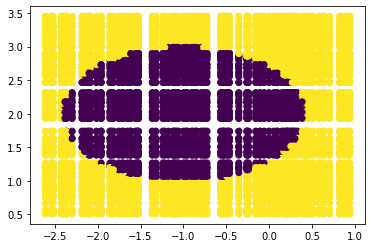

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

N = 100
x = np.random.uniform(-2.75, 1, N)
y = np.random.uniform(0.5, 3.5, N)
X, Y = np.meshgrid(x, y)

plt.figure()
plt.scatter(X, Y, c=~bernoulli(X, Y))

**Ahora aproximamos el área de la región usando 10 términos o 10 "dardos"**

In [14]:
montecarlo(bernoulli, -2.75, 1, 0.5, 3.5, 10)

3.375

**Aproximación de área de la región usando 100 términos o 100 dardos**

In [17]:
montecarlo(bernoulli, -2.75, 1, 0.5, 3.5, 100)

4.6125

**Aproximación de área de la región usando 1,000 términos o 1,000 dardos**

In [19]:
montecarlo(bernoulli, -2.75, 1, 0.5, 3.5, 1000)

4.2975

**Aproximación de área de la región usando 10,000 términos o 10,000 dardos**

In [20]:
montecarlo(bernoulli, -2.75, 1, 0.5, 3.5, 10000)

4.521375

**Aproximación de área de la región usando 100,000 términos o 100,000 dardos**

In [37]:
montecarlo(bernoulli, -2.75, 1, 0.5, 3.5, 100000)

4.4476875

Tenemos que la aproximación más precisa del área de la región descrita por: 
$$ x^2 + 2y^2 \leq -2x + 8y -7 $$

es de =~ 4.44 $u^2$ (unidades cuadradas de área)

Tabla con las aproximaciones de área utilizando $N$ términos (que van de 10, 100, 1,000, 10,000 y 100,000) y sus respectivos errores

Tenemos que el error para la aproximación de área utilizando Montecarlo es el siguiente:

$$ C_rel = \sqrt{\frac{1 - \frac{A_D}{A_R}}{\frac{A_D}{A_R}}} $$

Donde:
- $A_D$ es el área descrita por $ x^2 + 2y^2 \leq -2x + 8y -7 $
- $A_R$ es el área de la región que queremos aproximar

In [72]:
def error_area (AD, AR) :
    return ( (1 - (AD/AR))/(AD/AR) )**1/2

In [108]:
import pandas as pd
import numpy as np

def bernoulli(x, y) :
    return ( x**2 + 2*y**2 ) <= ( -2*x + 8*y -7 )

N = np.logspace(1, 5, 5)
table = pd.DataFrame(columns=['Aproximación de área' , 'Error'], index = N)

for i in N :
    x1 = np.random.uniform(-2.75, 1, int(i))
    y1 = np.random.uniform(0.5, 3.5, int(i))
    AD1 = (x1)*(y1)

    table.loc[i, 'Aproximación de área'] = montecarlo(bernoulli, -2.75, 1, 0.5, 3.5, int(i))
    table['Error'] = np.abs( np.mean(error_area(AD1, montecarlo(bernoulli, -2.75, 1, 0.5, 3.5, int(i))))- table['Aproximación de área'])
table

,Aproximación de área,Error
10.0,3.375,3.895861
100.0,5.2875,5.808361
1000.0,4.59,5.110861
10000.0,4.401,4.921861
100000.0,4.440937,4.961798


---

3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

***Ingeniería Financiera***

## Primer caso: Valoración de proyectos de inversión

La integración Montecarlo es útil para valorar proyectos empresariales y de inversión. Hay un componente de probabilidad que se basa en estimaciones, y cuantas más proyecciones hagamos, más preciso será el resultado estimado. Y el resultado obtenido se basa en grados de confianza, obtenemos un resultado y una probabilidad de acierto.

Hay variables que sabemos de partida, por tanto se asumen como datos del modelo. En cambio, las que desconocemos y queremos estimar, son sobre las que trabajaremos y denominamos variables independientes. 

Las aplicaciones de la integración Montecarlo en la valoración de proyectos de inversión son las siguientes:

- **Rentabilidad de proyectos:** De esta manera determinamos si es interesante o atractivo una inversión, o al contrario, qué inverisón sería necesaria.
- **Riesgos:** Hay dos elementos básicos en la estimación del riesgo, la probabilidad de que ocurra el evento y la gravedad, en este caso, que tanto podemos perder si realizamos cierta inversión.

*Fuente:* Bank, E. S. (2018, 25 mayo). El método Montecarlo en finanzas. El blog de SelfBank by Singular Bank. Recuperado 21 de octubre de 2022, de https://blog.selfbank.es/el-metodo-montecarlo-en-finanzas/

## Segundo caso: Valuación de opciones

Una opción es un contrato entre dos personas para adquirir o vender un bien o un activo llamado subyacente a un precio y en una fecha fijados de antemano. A la fecha se le llama fecha de maduración y al precio se le conoce como precio de ejercicio. Si la opción es de compra se llama un call, si es de venta se llama un put.

En el caso de la valuación de opciones, el método Montecarlo se usa para calcular la siguiente integral:

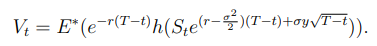


**Algoritmo Montecarlo para valuar opciones:**

Para valuar una opción al tiempo cero o sea $V_0$, denotemos por $I=V_t$ y a $Var_i$ por la varianza acumulada hasta la iteración $i$ 


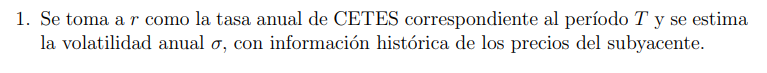

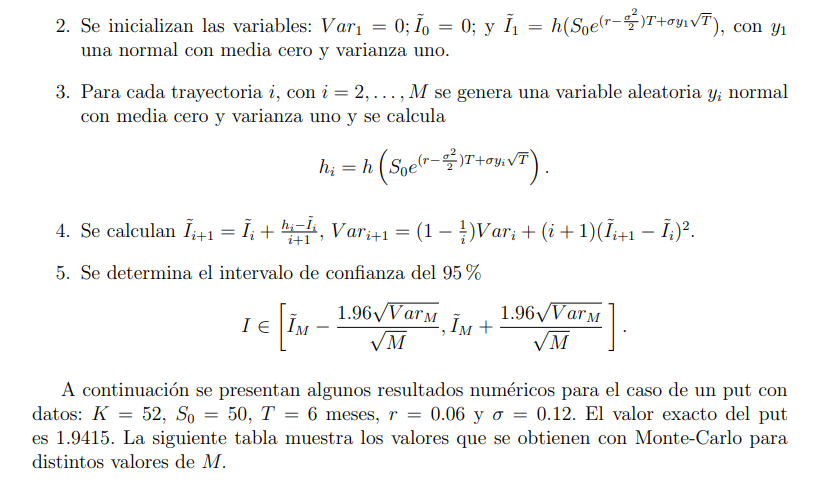

*Referencia: http://mat.izt.uam.mx/mat/documentos/notas%20de%20clase/cfenaoe3.pdf*

## Tercer caso: Aproximación de la solución de un proceso estocástico

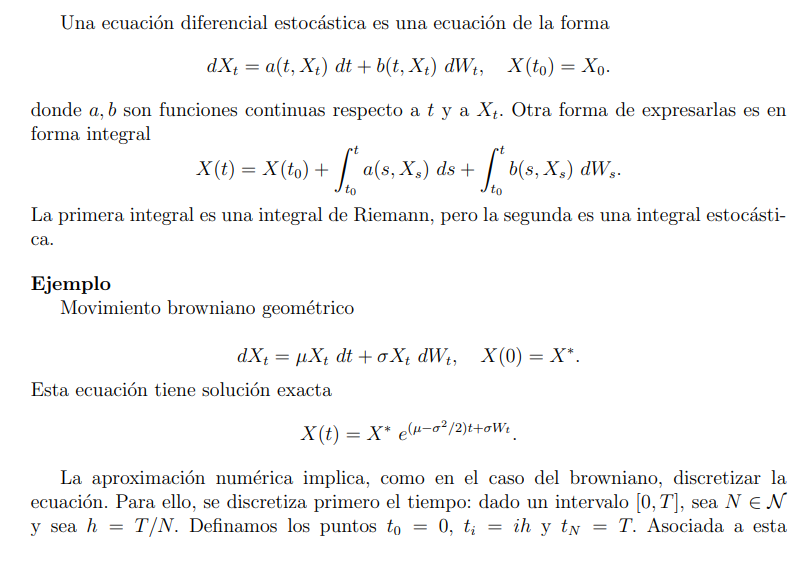


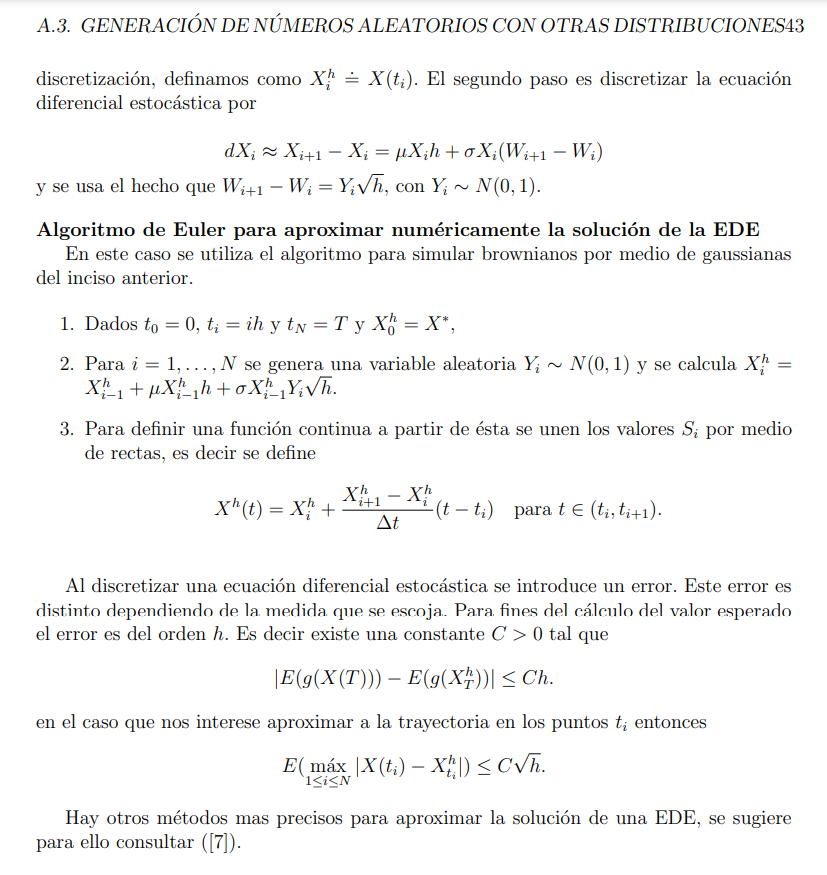

*Referencia: http://mat.izt.uam.mx/mat/documentos/notas%20de%20clase/cfenaoe3.pdf*

---